In [1]:
import os
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Change the working directory to the parent directory to allow importing the segadb package.
notebook_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(notebook_dir, '..', '..'))
sys.path.append(parent_dir)

from sega_learn.neural_networks import *

print(f"Working directory: {notebook_dir}")
print(f"Parent directory: {parent_dir}")

Working directory: c:\Users\sega9\OneDrive\Documents\Projects\sega_learn\tests_performance\nn
Parent directory: c:\Users\sega9\OneDrive\Documents\Projects\sega_learn


In [3]:
def time_function(func, num_repeats, *args, **kwargs):
    times = []
    for _ in range(num_repeats):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        times.append(end_time - start_time)
    avg_time = np.mean(times)
    stddev_time = np.std(times)
    return avg_time, stddev_time, result

In [58]:
from test_nn import *
from test_nn_cupy import *

## Run Time Comparison of Neural Network Implementations
### Comparison of CPU (numpy) and CPU (cupy) implementations

In [ ]:
# Constants for testing
num_repeats = 10

# Neural Network Timing
nnt_layer_sizes_multiplier = 5
nnt_dataset_size = 300_000

# Optimizer Timing
optt_layer_sizes_multiplier = 50

# Loss Function Timing
losst_layer_sizes_multiplier = 10
losst_dataset_size = 1_000_000

# Train Epoch Timing
epocht_layer_sizes_multiplier = 1
epocht_dataset_sizes = [1_000, 5_000, 10_000, 50_000, 100_000]

#### Neural Network Timing

In [68]:
print("Base NN Timing Implementation:")
nn_base = time_nn_base(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

print("\n\nCuPy NN Timing Implementation:")
nn_cupy = time_nn_cupy(num_repeats, nnt_layer_sizes_multiplier, nnt_dataset_size)

Base NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 1 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 300,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std Dev (s)
forward             : 4.202460 seconds ± 0.000000 seconds
apply_dropout       : 1.713424 seconds ± 0.000000 seconds
backward            : 4.329083 seconds ± 0.000000 seconds
calculate_loss      : 2.879344 seconds ± 0.000000 seconds
evaluate            : 2.352680 seconds ± 0.000000 seconds
train (X,y Reduced) : 4.378284 seconds ± 0.000000 seconds


CuPy NN Timing Implementation:

Timing results for NeuralNetwork methods (averaged over 1 runs):
Performance for Layer sizes: [500, 250, 50], Dataset size: 300,000 samples
----------------------------------------------------------------------------------------------------
Function            : Average Time (s) ±  Std Dev 

#### Optimizer Timing

In [7]:
print("Base NN Optimizer Implementation:")
nn_optimizer_times = time_nn_optimizer(num_repeats, optt_layer_sizes_multiplier)

print("\n\nCuPy NN Optimizer Implementation:")
nn_optimizer_times_cupy = time_nn_optimizer_cupy(num_repeats, optt_layer_sizes_multiplier)

Base NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 5 runs):
Performance for Layer sizes: [5000, 3750, 2500, 1250]
----------------------------------------------------------------------------------------------------
Optimizer Function       : Average Time (s) ±  Std Dev (s)
Adam_initialize          : 0.097800 seconds ± 0.016971 seconds
SGD_initialize           : 0.063394 seconds ± 0.003131 seconds
Adadelta_initialize      : 0.244608 seconds ± 0.179979 seconds
----------------------------------------------------------------------
Adam_update              : 1.356145 seconds ± 0.056898 seconds
SGD_update               : 0.455335 seconds ± 0.015804 seconds
Adadelta_update          : 1.592423 seconds ± 0.165706 seconds


CuPy NN Optimizer Implementation:

Timing results for Optimizer methods (averaged over 5 runs):
Performance for Layer sizes: [5000, 3750, 2500, 1250]
-----------------------------------------------------------------------------------------

#### Loss Function Timing

In [8]:
print("Base NN Loss Implementation:")
nn_loss_base = time_nn_loss(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

print("\n\nCuPy NN Loss Implementation:")
nn_loss_cupy = time_nn_loss_cupy(num_repeats, losst_layer_sizes_multiplier, losst_dataset_size)

Base NN Loss Implementation:

Timing results for Loss functions (averaged over 5 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 5.571544 seconds ± 5.645382 seconds
BCEWithLogitsLoss        : 0.055604 seconds ± 0.003724 seconds


CuPy NN Loss Implementation:

Timing results for Loss functions (averaged over 5 runs):
Performance for Layer sizes: [1000, 500, 100], Dataset size: 1,000,000 samples
----------------------------------------------------------------------------------------------------
Loss Function            : Average Time (s) ±  Std Dev (s)
CrossEntropyLoss         : 1.468703 seconds ± 0.954915 seconds
BCEWithLogitsLoss        : 0.024240 seconds ± 0.038977 seconds


#### Epoch Timings

In [9]:
print("Base NN Single Epoch Implementation:")
nn_epoch_base = time_nn_epoch(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

print("\n\nCuPy NN Single Epoch Implementation:")
nn_epoch_cupy = time_nn_epoch_cupy(num_repeats, epocht_layer_sizes_multiplier, epocht_dataset_sizes, save_csv=False)

Base NN Single Epoch Implementation:
Training on dataset size 1,000 samples
Training on dataset size 5,000 samples
Training on dataset size 10,000 samples
Training on dataset size 50,000 samples
Training on dataset size 100,000 samples


CuPy NN Single Epoch Implementation:
Training on dataset size 1,000 samples
Training on dataset size 5,000 samples
Training on dataset size 10,000 samples
Training on dataset size 50,000 samples
Training on dataset size 100,000 samples


## Visualization of Neural Network Timing Results

### Setup

In [25]:
# Combine results from CPU and CuPy
def combine_results(*results_dicts):
    combined_results = []
    for results_dict in results_dicts:
        for func_name, (avg_time, stddev_time) in results_dict.items():
            combined_results.append([func_name, avg_time, stddev_time])
    
    # Create DataFrame from collected results
    results = pd.DataFrame(combined_results, columns=["Function", "Average Time (s)", "Std Dev (s)"])
    
    return results

In [33]:
cpu_results = combine_results(nn_base, nn_optimizer_times, nn_loss_base)
cupy_results = combine_results(nn_cupy, nn_optimizer_times_cupy, nn_loss_cupy)

In [36]:
# Add a column to distinguish CPU and CuPy results
cpu_results["Implementation"] = "CPU"
cupy_results["Implementation"] = "CuPy"

# Combine the datasets
results = pd.concat([cpu_results, cupy_results])
results

,Function,Average Time (s),Std Dev (s),Implementation
0,forward,0.775015,0.029583,CPU
1,apply_dropout,0.568570,0.018161,CPU
2,backward,0.784885,0.061722,CPU
3,calculate_loss,0.911131,0.016358,CPU
4,evaluate,0.793802,0.019337,CPU
5,train,1.480077,0.079252,CPU
6,Adam_initialize,0.097800,0.016971,CPU
7,Adam_update,1.356145,0.056898,CPU
8,SGD_initialize,0.063394,0.003131,CPU
9,SGD_update,0.455335,0.015804,CPU


In [35]:
# Create a pivot table for easier comparison
pivot_results = results.pivot(index='Function', columns='Implementation', values='Average Time (s)').reset_index()
pivot_results['Speedup (%)'] = ((pivot_results['CPU'] - pivot_results['CuPy']) / pivot_results['CPU'] * 100)

# Sort functions by CPU execution time for better readability
pivot_results = pivot_results.sort_values('CPU', ascending=False)
pivot_results

Implementation,Function,CPU,CuPy,Speedup (%)
5,CrossEntropyLoss,5.571544,1.468703,73.639211
1,Adadelta_update,1.592423,0.473025,70.295258
13,train,1.480077,0.920602,37.800424
3,Adam_update,1.356145,0.076399,94.366487
10,calculate_loss,0.911131,0.557359,38.827834
11,evaluate,0.793802,0.265585,66.542692
9,backward,0.784885,0.090805,88.430824
12,forward,0.775015,0.151400,80.464968
8,apply_dropout,0.568570,0.153610,72.983126
7,SGD_update,0.455335,0.036400,92.005985


In [ ]:
_nn_epoch_base = pd.DataFrame(nn_epoch_base, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_base["Implementation"] = "CPU"

_nn_epoch_cupy = pd.DataFrame(nn_epoch_cupy, columns=['Dataset Size', 'Average Time (s)', 'Std Dev (s)'])
_nn_epoch_cupy["Implementation"] = "CuPy"

# Combine the datasets
epoch_results = pd.concat([_nn_epoch_base, _nn_epoch_cupy])
epoch_results

,Dataset Size,Average Time (s),Std Dev (s),Implementation
0,1000,0.018999,0.014602,CPU
1,5000,0.058600,0.005642,CPU
2,10000,0.113200,0.002396,CPU
3,50000,0.593705,0.011314,CPU
4,100000,1.224474,0.007802,CPU
0,1000,0.124406,0.071852,CuPy
1,5000,0.418402,0.004759,CuPy
2,10000,0.823402,0.003078,CuPy
3,50000,4.184807,0.050511,CuPy
4,100000,8.723153,0.290655,CuPy


In [37]:
# Set Seaborn style with improved readability
sns.set_theme(style="whitegrid", font_scale=1.2)
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['axes.titlepad'] = 15
plt.rcParams['font.family'] = 'sans-serif'

### Visualizations

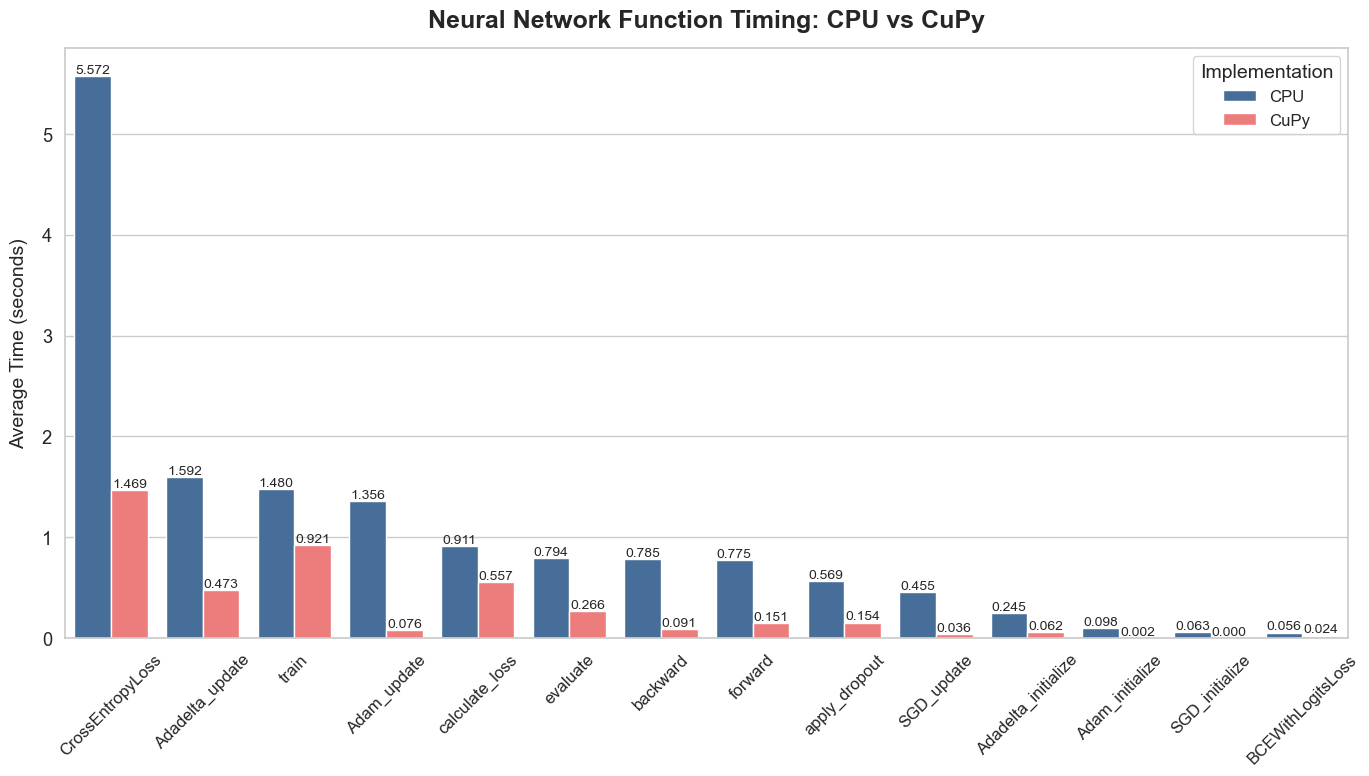

In [38]:
# First plot: Timing comparison
plt.figure(figsize=(14, 8))
melted_data = pd.melt(pivot_results, id_vars=['Function'], value_vars=['CPU', 'CuPy'])
melted_data.rename(columns={'variable': 'Implementation'}, inplace=True)

sns.barplot(x='Function', y='value', hue='Implementation', 
            data=melted_data,
            palette=['#3A6EA5', '#FF6B6B'])

plt.title('Neural Network Function Timing: CPU vs CuPy', fontsize=18, fontweight='bold')
plt.ylabel('Average Time (seconds)', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12)
plt.legend(title='Implementation', fontsize=12, title_fontsize=14)

# Add value labels on bars
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.3f', fontsize=10)

plt.tight_layout()
plt.show()

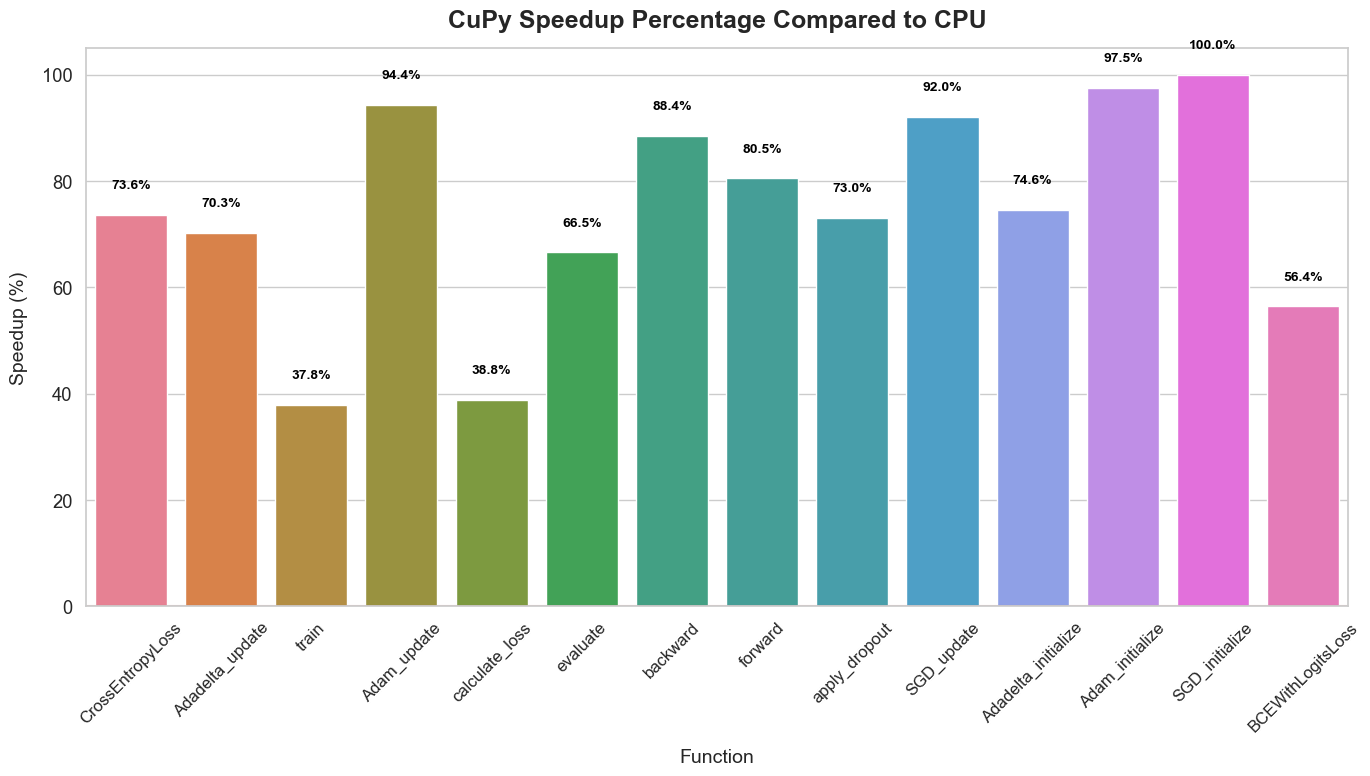

In [43]:
# Second plot: Speedup percentage
pivot_results.sort_values('Speedup (%)', ascending=False)

plt.figure(figsize=(14, 8))
speedup_bars = sns.barplot(x='Function', y='Speedup (%)', data=pivot_results, hue='Function')
plt.title('CuPy Speedup Percentage Compared to CPU', fontsize=18, fontweight='bold')
plt.ylabel('Speedup (%)', fontsize=14)
plt.xlabel('Function', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)

# Add value labels on speedup bars
for i, v in enumerate(pivot_results['Speedup (%)']):
    plt.text(i, max(v + 5, 5) if v > 0 else v - 15, 
             f"{v:.1f}%", ha='center', fontsize=10, 
             fontweight='bold', color='black')

# Highlight negative speedups (where CPU is faster)
for i, v in enumerate(pivot_results['Speedup (%)']):
    if v < 0:
        speedup_bars.patches[i].set_facecolor('#FF7F7F')  # Light red for negative speedup

plt.tight_layout()
plt.show()

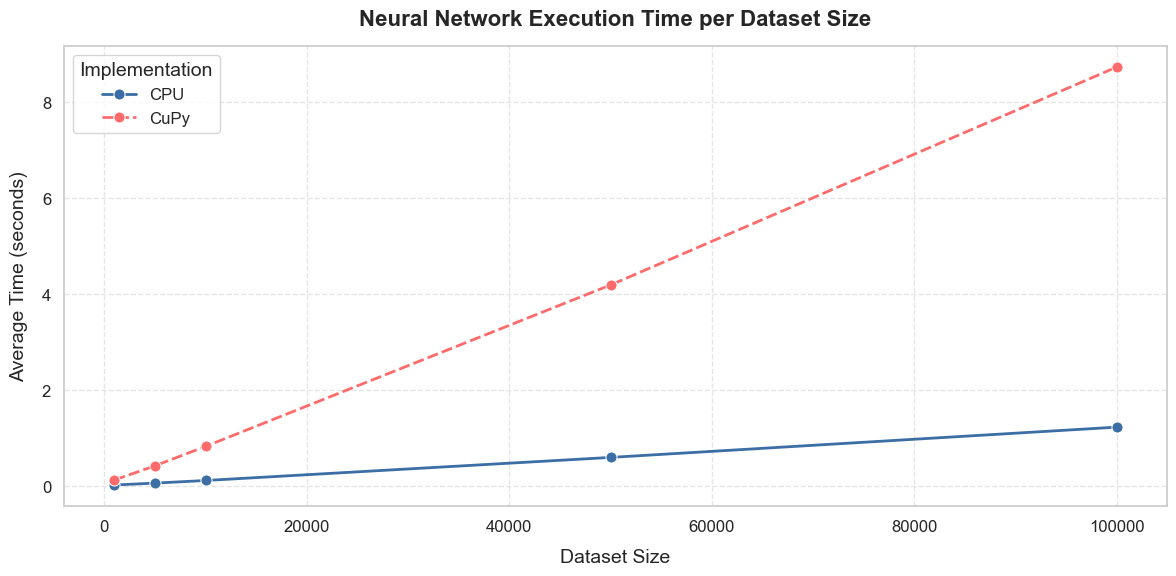

In [57]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=epoch_results, x="Dataset Size", y="Average Time (s)", 
             hue="Implementation", marker="o", 
             palette=["#3A6EA5", "#FF6B6B"], 
             linewidth=2, markersize=8, 
             err_style="bars", err_kws={'capsize': 4}, 
             style="Implementation")

# Add title and labels
plt.title("Neural Network Execution Time per Dataset Size", fontsize=16, fontweight="bold")
plt.xlabel("Dataset Size", fontsize=14)
plt.ylabel("Average Time (seconds)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Implementation", fontsize=12, title_fontsize=14)

# Show the plot
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()
